## Knjižnica `Seaborn`

Zdaj, ko smo se seznanili z Matplotlib, je čas, da raziščemo Seaborn, zmogljivo knjižnico za Python, zgrajeno na osnovi Matplotliba, ki poenostavi ustvarjanje statistično smiselnih vizualizacij.

Medtem ko nam Matplotlib omogoča natančen nadzor nad vsakim vidikom grafa, se Seaborn osredotoča na visokonivojske abstrakcije, ki olajšajo vizualizacijo kompleksnih podatkovnih nizov z manj vrsticami kode. Ponuja:

* vgrajene teme in barvne palete za privlačnejše grafe,
* samodejno agregacijo in statistično ocenjevanje (npr. srednje vrednosti, intervali zaupanja),
* poenostavljeno sintakso za pogoste vrste grafov, kot so boxploti, violinski grafi in toplotne karte,
* tesno integracijo s pandas DataFrame, kar ga naredi idealnega za naloge podatkovnega rudarjenja.

### Primer: zimske olimpijske igre, Soči 2014

V tem delu bomo uporabili Seaborn za raziskovanje vzorcev v podatkih iz olimpijskih iger. Začeli bomo s porazdelitvami, odnosi in primerjavami lastnosti športnikov, kot so starost, spol, šport in medalje.

## Library `Seaborn`

Now that we're familiar with Matplotlib, it's time to explore Seaborn, a powerful Python library built on top of Matplotlib that simplifies the process of creating statistically meaningful visualizations.

While Matplotlib gives us fine-grained control over every aspect of a plot, Seaborn focuses on high-level abstractions that make it easier to visualize complex datasets with fewer lines of code. It comes with:

* Built-in themes and color palettes for more attractive plots.
* Automatic aggregation and statistical estimation (e.g., means, confidence intervals).
* Simplified syntax for common plot types like boxplots, violin plots, and heatmaps.
* Tight integration with pandas DataFrames, making it ideal for data mining tasks.

### Example: Winter Olympics, Sochi 2014

In this section, we'll use Seaborn to explore patterns in the Sochi 2014 Olympic dataset, starting with distributions, relationships, and comparisons across athlete attributes like age, gender, sport, and medals.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_table('../data/athletes.tab', skiprows=[1])
data['birthdate'] = pd.to_datetime(data['birthdate'])
data['bmi'] = data['weight'] / (data['height']) ** 2
data['age_group'] = pd.cut(data['age'], [0, 20, 30, 40, 100], labels=["<20", "20-30", "30-40", "40+"])

### Prikaz točk v prostoru

Poglejmo, ali sta višina in teža športnikov povezani. Za vsakega športnika narišimo točko v prostoru dveh spremelnjivk - razsevni diagram (ang. *scatter plot*).

### Display points in space

Let's see if the height and weight of athletes are linked. For each athlete we draw a point in the space of two variables - a Scatter plot.

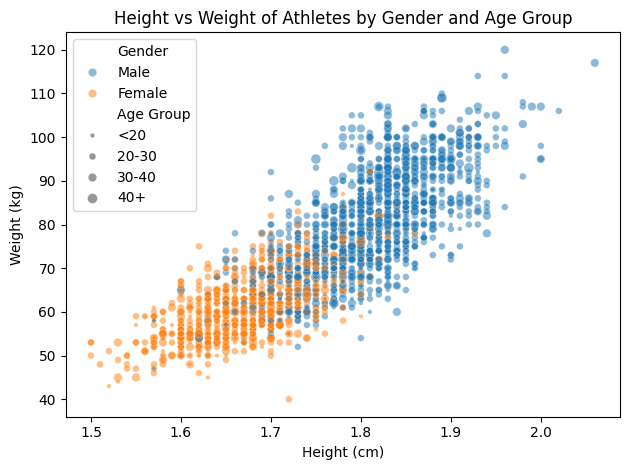

In [2]:
scatter = sns.scatterplot(
    x=data['height'], 
    y=data['weight'], 
    hue=data['gender'], 
    size=data['age_group'], 
    sizes=(50, 10), 
    alpha=0.5
)    

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight of Athletes by Gender and Age Group')

handles, labels = scatter.get_legend_handles_labels()
new_labels = [label.replace('_', ' ').title() for label in labels]
scatter.legend(handles=handles, labels=new_labels)

plt.tight_layout()
plt.show()


Videti je, da sta spremenljivki povezani. Funkcija `lmplot` v Seaborn združuje razsevni diagram z linearnim regresijskim modeliranjem (več o tem v naslednjih tednih) in tako olajša vizualizacijo posameznih podatkovnih točk ter trenda, ki se jim najbolje prilega. Še posebej je uporabna za raziskovanje morebitnih linearnih povezav med dvema zveznima spremenljivkama. Na primer, če prikažemo višino glede na težo, lahko ugotovimo, ali so višji športniki praviloma težji in kako močna je ta povezava.

It looks like the variables are linked. The `lmplot` function in Seaborn combines scatter plotting with linear regression modeling (more on this in the following weeks), making it easy to visualize both individual data points and the trend that best fits them. It’s particularly useful for exploring potential linear relationships between two continuous variables. For example, plotting Height against Weight can reveal whether taller athletes tend to be heavier and how strong that relationship appears.

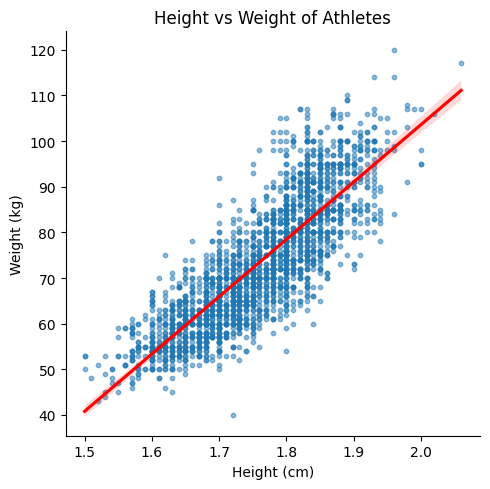

In [3]:
sns.lmplot(
    x='height', 
    y='weight', 
    data=data, 
    ci=100, 
    scatter_kws={
        'alpha':0.5, 
        's':10
    }, 
    line_kws={'color':'red'})

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight of Athletes')

plt.tight_layout()
plt.show()


### Prikaz porazdelitev

Funkcija `displot` v Seaborn je namenjena vizualizaciji porazdelitve ene same spremenljivke. Ustvari lahko histograme, ocene jedrne gostote (KDE) ali oboje skupaj, kar nam da vpogled v obliko, razpršenost in osrednjo tendenco podatkov. To je še posebej uporabno pri raziskovanju vprašanj, kot so: Ali so športniki večinoma zbrani okoli določene teže? ali Ali porazdelitev starosti kaže več vrhov? Ker dobro deluje s pandas DataFrame, `displot` omogoča tudi enostavno primerjavo porazdelitev med različnimi podskupinami podatkov.

### Display distributions

The `displot` function in Seaborn is designed for visualizing the distribution of a single variable. It can create histograms, kernel density estimates (KDEs), or both combined, giving insight into the shape, spread, and central tendency of the data. This makes it especially useful for exploring questions like: Are most athletes clustered around a certain weight? or Does the distribution of ages show multiple peaks? Because it works well with pandas DataFrames, `displot` also makes it easy to compare distributions across different subsets of data.

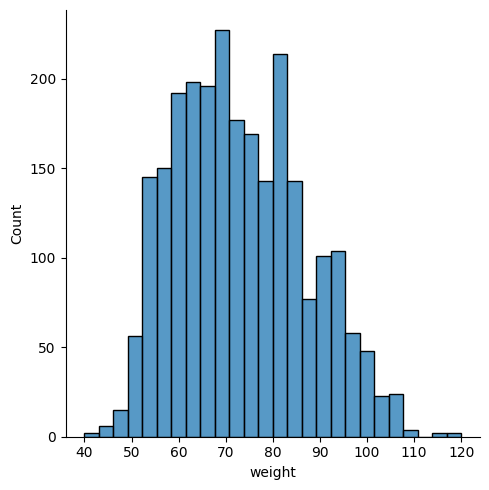

In [4]:
sns.displot(data['weight']);

##### Vprašanje 2-2-1

Ali so porazdelitev teže med posameznimi športi razlikuje? Kaj pa višine? Izberi športnike nekaterih športov in med njimi primerjaj porazdelitve.

##### Question 2-2-1

Is the weight distribution different for different sports? What about the heights? Choose athletes of some sports and compare distributions between them.

[Odgovor](202-2.ipynb#Odgovor-2-2-1)

[Answer](202-2.ipynb#Answer-2-2-1)

### Toplotna karta

Razmerje med višino in težo bomo raziskali tudi s toplotno karto. Ker imata spremenljivki različne vrednostne razpone, ju moramo najprej normalizirati, da postaneta primerljivi.

### Heat map

We will also explore the relationship between height and weight using a heatmap. Since the attributes have different ranges, we first need to normalize them so they are comparable.

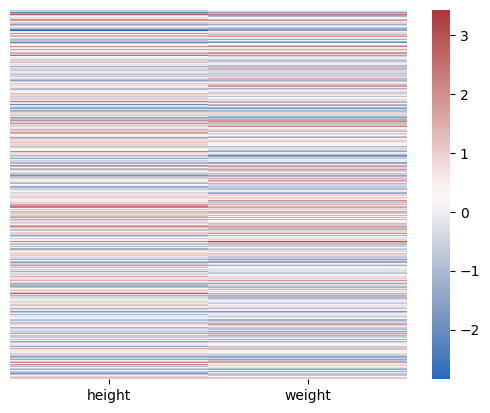

In [5]:
from sklearn.preprocessing import StandardScaler

# Select features and normalize
features = data[['height', 'weight']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with normalized features
scaled_df = pd.DataFrame(scaled_features, columns=['height', 'weight'])

sns.heatmap(scaled_df, cmap='vlag', yticklabels=False)

plt.show();

Ni preveč informativno. Vrstice s športniki lahko preuredimo, tako da bodo podobni športniki skupaj, s pomočjo hierarhičnega gručenja (več o tem čez nekaj tednov). Zraven lahko še dodamo še informacijo o športu, da vidimo, če so si športniki iz istega športa podobni.

It’s not very informative yet. We can rearrange the rows of athletes so that similar athletes appear together using hierarchical clustering (more on this in a few weeks). We can also add information about their sport to see whether athletes from the same sport tend to be similar.

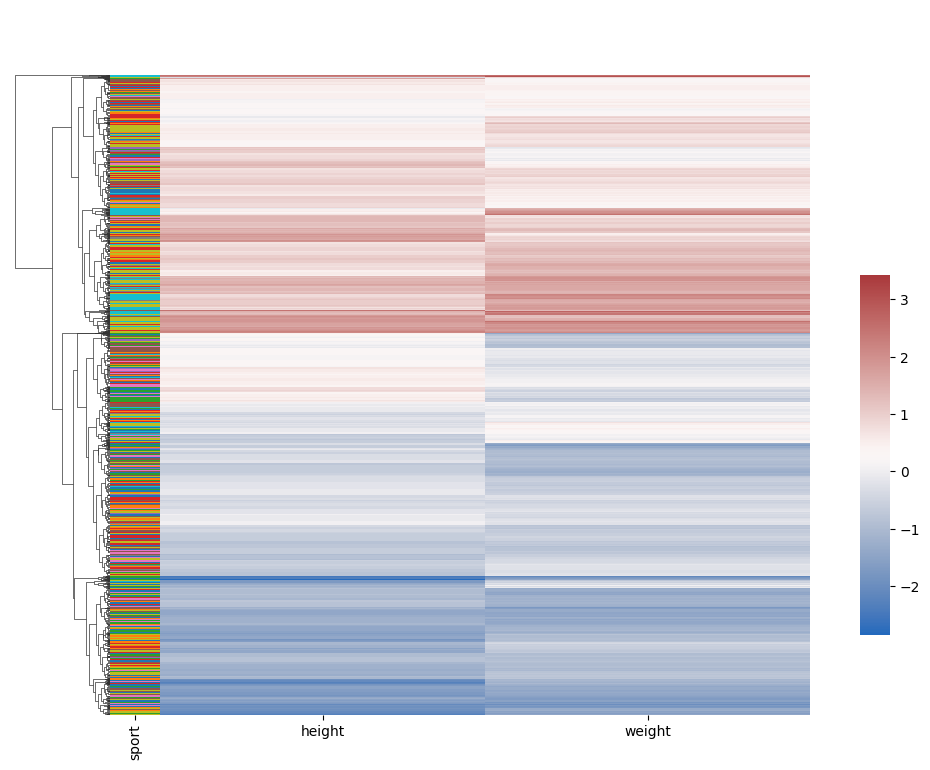

In [6]:
scaled_df['sport'] = data['sport']

sport_palette = dict(zip(scaled_df['sport'].unique(), sns.color_palette("tab10", len(scaled_df['sport'].unique()))))

row_colors = scaled_df['sport'].map(sport_palette)

cluster_data = scaled_df.drop(columns='sport')

g= sns.clustermap(cluster_data, row_colors=row_colors, figsize=(10, 8), cmap='vlag', col_cluster=False, yticklabels=False)

g.ax_row_dendrogram.set_position([0.1, 0.1, 0.1, 0.8])  
g.ax_row_colors.set_position([0.2, 0.1, 0.05, 0.8]) 
g.ax_heatmap.set_position([0.25, 0.1, 0.65, 0.8])  
g.cax.set_position([.95, .2, .03, .45])

plt.show()

### Gručena korelacijska toplotna karta

Gručenje korelacijske toplotne karte omogoča enostaven pregled povezanosti numeričnih spremenljivk med seboj. S prikazom parnih korelacij in združevanjem podobnih spremenljivk skupaj lažje opazimo vzorce in odnose. V našem primeru se bomo osredotočili na ključne značilke športnikov, kot so starost, višina, teža, indeks telesne mase (ITM) in število medalj, da vidimo, katere lastnosti se pogosto pojavljajo skupaj in kako močno so povezane. Ta pristop pomaga razkriti skrito strukturo v podatkih in lahko usmerja nadaljnje analize ali izbiro značilk.

### Clustered Correlation Heatmap

A clustered correlation heatmap provides a compact overview of how numerical variables relate to each other. By displaying pairwise correlations and grouping similar variables together, it makes patterns and associations easier to spot. In our case, we’ll focus on key athlete attributes, such as age, height, weight, BMI, and medal counts, to see which features tend to move together and how strongly they are related. This approach helps highlight underlying structure in the data and can guide further analysis or feature selection.

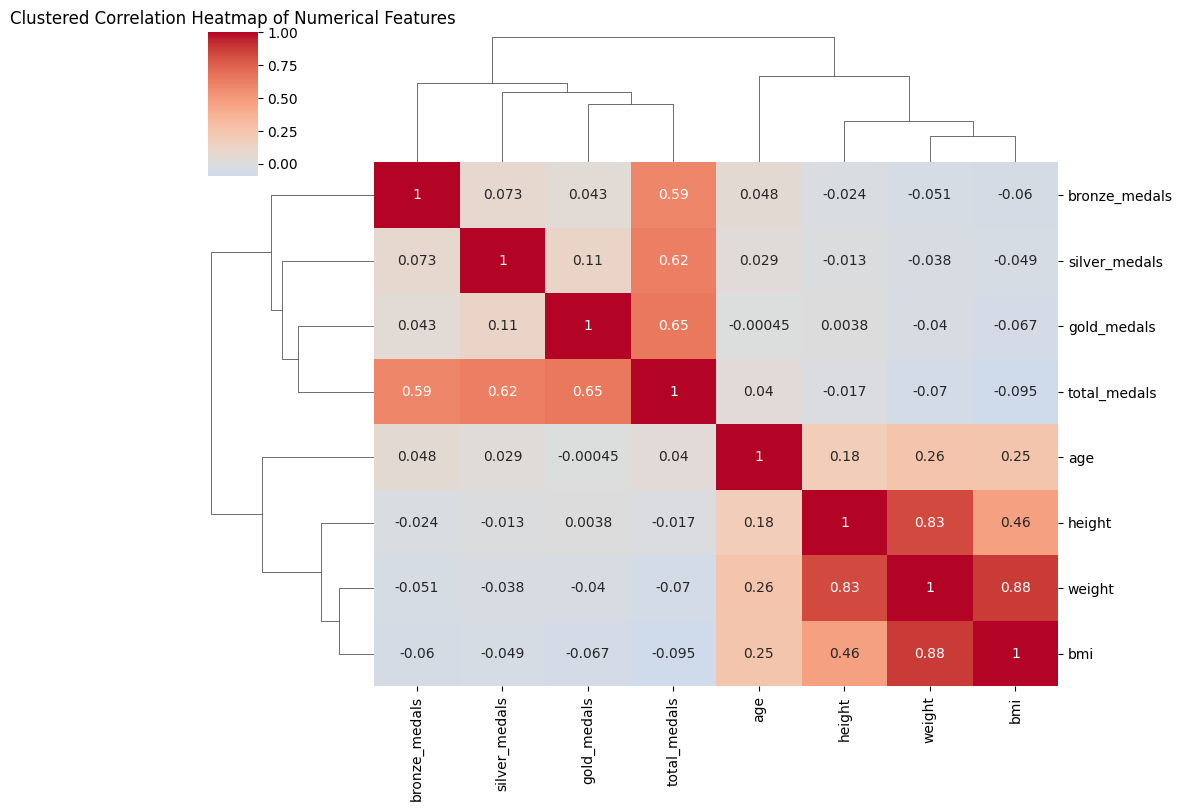

In [7]:
numerical_cols = ['age', 'height', 'weight', 'bmi', 'gold_medals', 'silver_medals', 'bronze_medals', 'total_medals']
numerical_data = data[numerical_cols]

corr_matrix = numerical_data.corr()

sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', center=0, figsize=(10, 8))
plt.title('Clustered Correlation Heatmap of Numerical Features')
plt.show()


### Spol udeležencev

Z uporabo `histplot` lahko ustvarimo histograme. Ustvarimo zložen histogram, ki prikazuje porazdelitev športnikov po državah, z ločenimi stolpci za vsak spol.

### Gender of participants

Using `histplot` we can create histograms. Let's create a stacked histogram showing the distribution of athletes by country, with separate bars for each gender. 

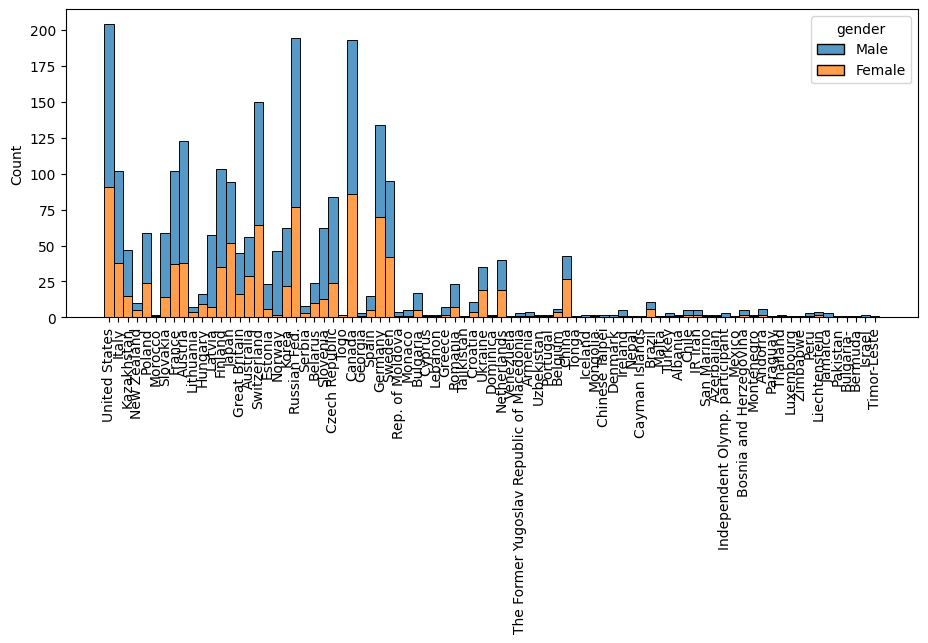

In [8]:
fig, ax = plt.subplots(figsize=(11, 4))
sns.histplot(data, x='country', hue='gender', multiple='stack', ax=ax)
plt.xticks(rotation=90)
plt.xlabel(None);

Graf bi bil bolj informativen, če bi bile države razvrščene glede na skupno število športnikov. Vendar Seaborn tega ne omogoča neposredno, zato moramo podatke predhodno obdelati v pandas, da dosežemo želen vrstni red.

The plot would be more informative if the countries were sorted by the total number of athletes. However, Seaborn doesn’t provide built-in support for this, so we need to preprocess the data in pandas to achieve the desired order.

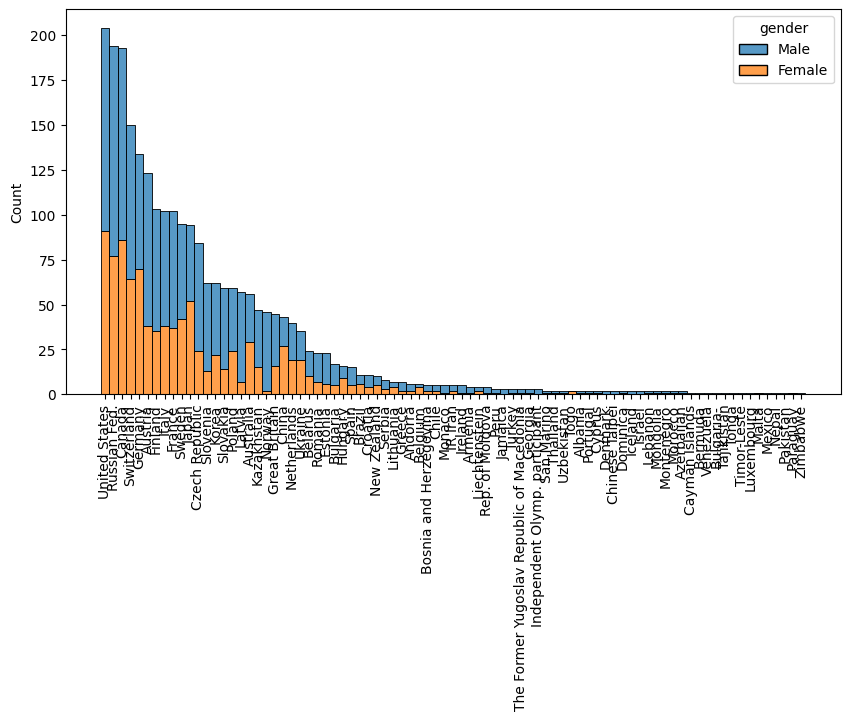

In [9]:
data_grouped = data.groupby(['country', 'gender'])['country'].count()
data_grouped = pd.DataFrame(data_grouped)
new_index = pd.MultiIndex.from_tuples(data_grouped.index)
data_grouped.index = new_index
data_grouped.reset_index(inplace=True)
data_grouped.columns = ['country', 'gender', 'count']
data_grouped['total_count'] = data_grouped.groupby(by='country')['count'].transform('sum')
data_grouped = data_grouped.sort_values(by=['total_count'], ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.histplot(x='country', hue='gender', data=data_grouped, ax=ax, multiple='stack', weights='count')
plt.xticks(rotation=90)
plt.xlabel(None);

#### Bonus

Enak rezultat lahko dosežemo veliko lažje z uporabo vgrajenih funkcij za risanje v pandas, ki nam omogočajo, da podatke predhodno razvrstimo neposredno pred risanjem grafa.

#### Bonus

We can achieve the same result much more easily using pandas’ built-in plotting functions, which allow us to sort the data directly before plotting.

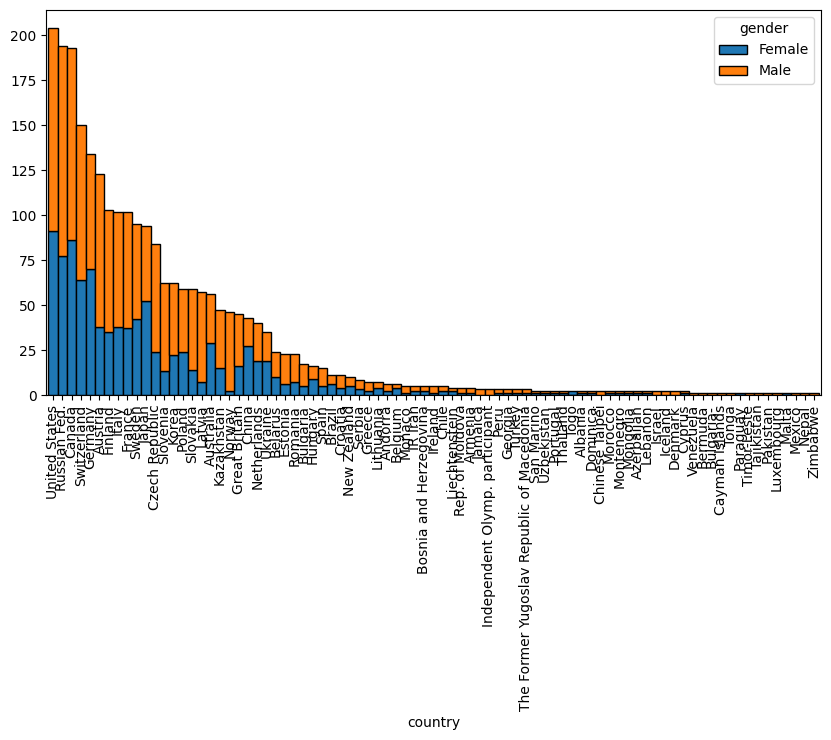

In [10]:
datac = pd.crosstab(data['country'], data['gender'])
datac['total'] = datac.sum(axis=1)
datac = datac.sort_values('total', axis=0, ascending=False)
datac.iloc[:, :-1].plot(kind='bar', stacked=True, figsize=(10, 5), rot=90, width=1, ec='k');

### Boxplot

Boxplot je standardiziran način prikaza porazdelitve podatkovnega nabora. Prikaže mediano, kvartile in morebitne odstopajoče vrednosti, kar omogoča hiter pregled središča, razpršenosti in asimetrije podatkov. Boxploti so še posebej uporabni za primerjavo porazdelitev med različnimi skupinami ali kategorijami.

### Boxplot

A boxplot is a standardized way of displaying the distribution of a dataset. It shows the median, quartiles, and potential outliers, giving a quick overview of the center, spread, and skewness of the data. Boxplots are particularly useful for comparing distributions across different groups or categories.

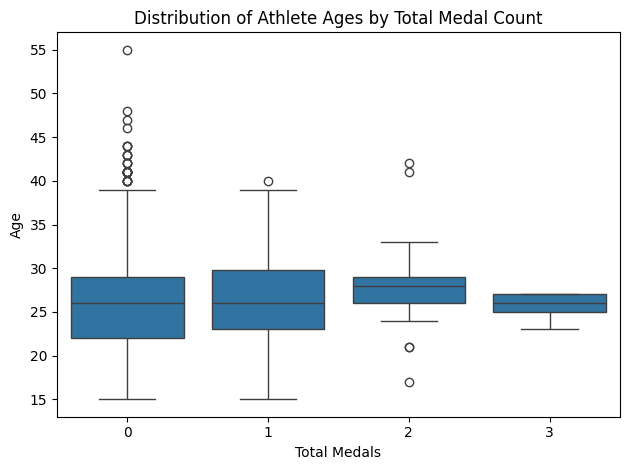

In [11]:
sns.boxplot(x='total_medals', y='age', data=data)

plt.xlabel('Total Medals')
plt.ylabel('Age')
plt.title('Distribution of Athlete Ages by Total Medal Count')
plt.tight_layout()
plt.show()

### Pairplot

Pairplot omogoča vizualizacijo razmerij med več numeričnimi spremenljivkami v podatkovnem naboru. Združuje razsevne diagrame za vsak par spremenljivkin histograme na diagonali, kar omogoča hiter pregled korelacij, trendov in porazdelitev. To je še posebej uporabno za raziskovanje morebitnih povezav med več spremenljivkami hkrati.

### Pairplot

A pairplot visualizes pairwise relationships between multiple numerical variables in a dataset. It combines scatterplots for each pair of features, and histograms along the diagonal, providing a quick overview of correlations, trends, and distributions. This is especially useful for exploring potential relationships between several variables at once.

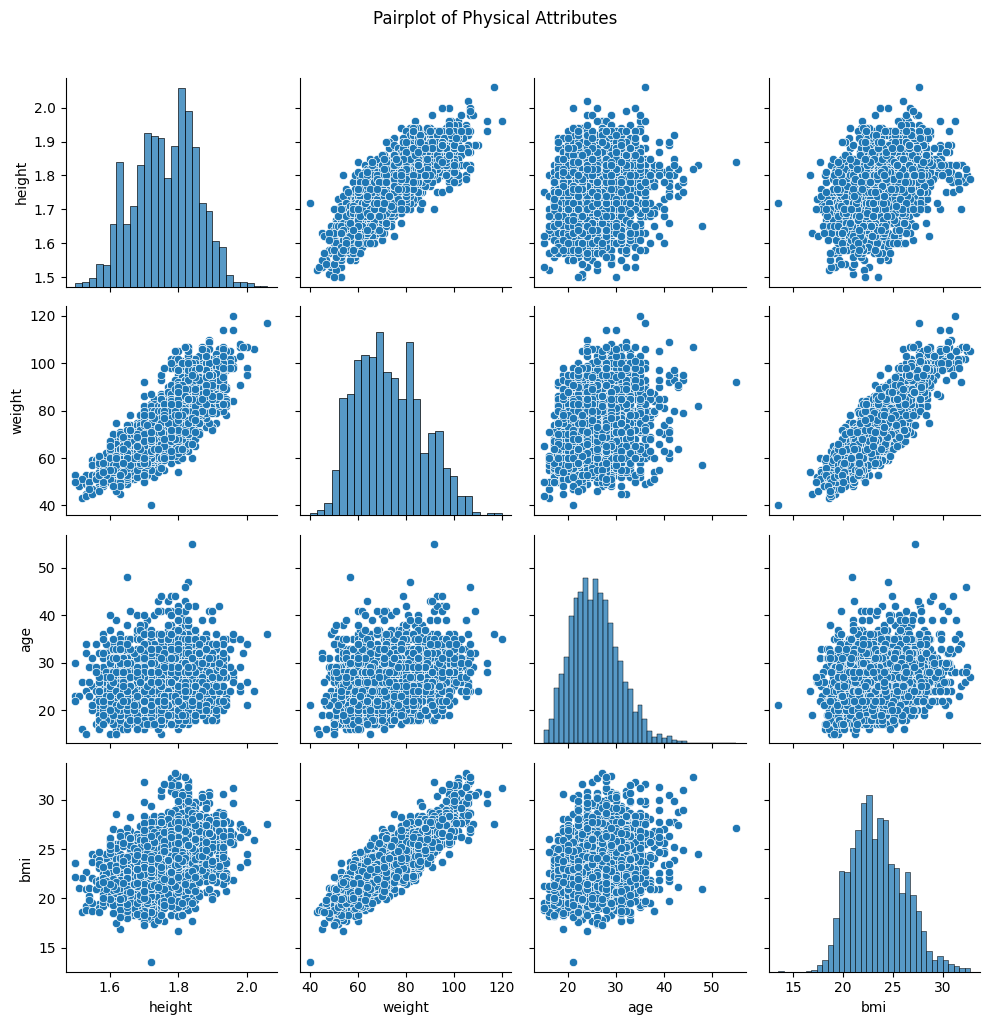

In [12]:
sns.pairplot(data[['height', 'weight', 'age', 'bmi']])

plt.suptitle('Pairplot of Physical Attributes', y=1.02)
plt.tight_layout()
plt.show()

### FacetGrid

FacetGrid v Seaborn omogoča ustvarjanje mreže podgrafov na osnovi ene ali več kategoričnih spremenljivk. Vsak podgraf prikazuje podmnožico podatkov, kar olajša primerjavo vzorcev med skupinami. V tem primeru smo podatke razdelili po spolu (vrstice) in starostnih skupinah (stolpci) ter v vsakem podgrafu prikazali višino glede na težo, da raziskujemo, kako se ti odnosi razlikujejo med različnimi kategorijami.

### FacetGrid

FacetGrid in Seaborn allows us to create a grid of subplots based on one or more categorical variables. Each subplot shows a subset of the data, making it easy to compare patterns across groups. In this example, we split the data by gender (rows) and age group (columns) and plot height versus weight in each panel to explore how these relationships vary across categories.

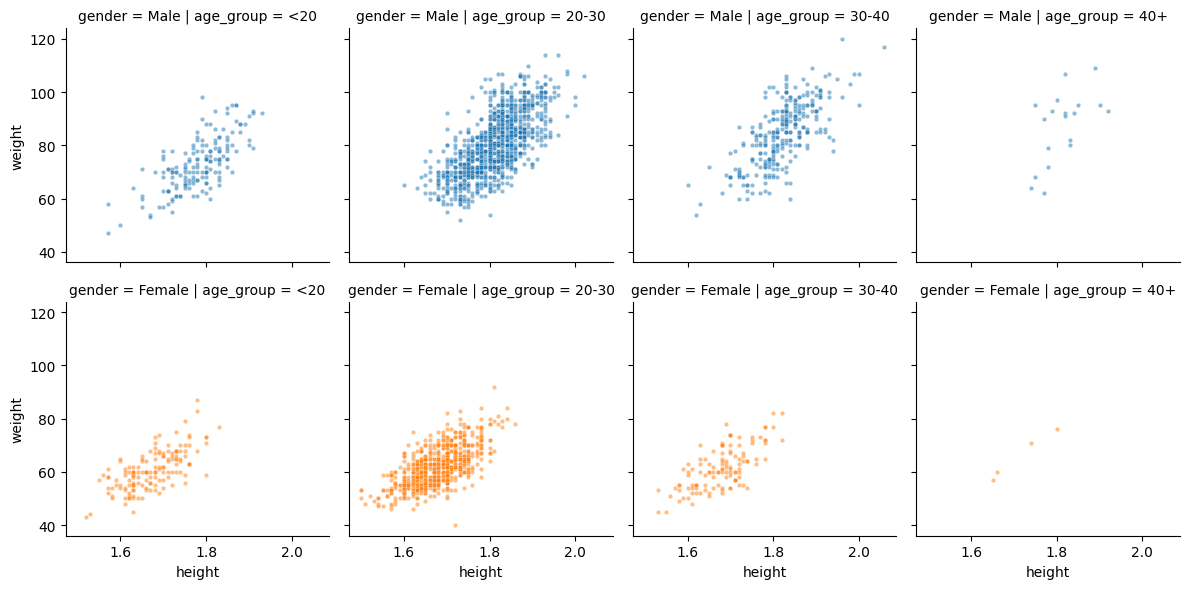

In [13]:
g = sns.FacetGrid(data, row='gender', col='age_group', hue="gender")
g.map(sns.scatterplot, 'height', 'weight', alpha=0.5, s=10)
plt.tight_layout()
plt.show()

## Knjižnica `Altair`

Altair je deklarativna knjižnica za statistične vizualizacije v Pythonu. Za razliko od imperativnih knjižnic, kjer opisujemo kako narisati graf po korakih, se Altair osredotoča na kaj želimo vizualizirati. Z določanjem odnosov med stolpci podatkov in vizualnimi lastnostmi lahko hitro ustvarimo jasne, interaktivne in estetsko prijetne grafe. Odlično se povezuje s pandas DataFrames in podpira širok nabor vrst grafov, vključno s stolpičnimi, raztresenimi, linijskimi grafi in faceti, zaradi česar je idealen za raziskovalno analizo podatkov.

## Library `Altair`

Altair is a declarative statistical visualization library for Python. Unlike imperative libraries, where you describe how to draw a plot step by step, Altair focuses on what you want to visualize. By specifying the relationships between data columns and visual properties, you can quickly create clear, interactive, and aesthetically pleasing charts. It integrates seamlessly with pandas DataFrames and supports a wide range of chart types, including bar charts, scatterplots, line charts, and faceted views, making it ideal for exploratory data analysis.

In [14]:
import altair as alt

In [15]:
medals_melted = data.melt(
    id_vars=['country'],
    value_vars=['gold_medals', 'silver_medals', 'bronze_medals'],
    var_name='medal_type',
    value_name='count'
)

medals_melted['medal_type'] = medals_melted['medal_type'].map({
    'gold_medals': 'Gold',
    'silver_medals': 'Silver',
    'bronze_medals': 'Bronze'
})

medal_counts = medals_melted.groupby(['country', 'medal_type'])['count'].sum().reset_index()
total_medals = medal_counts.groupby('country')['count'].sum().reset_index()
non_zero_countries = total_medals[total_medals['count'] > 0]['country']
medal_counts = medal_counts[medal_counts['country'].isin(non_zero_countries)]

medal_colors = {
    'Gold': '#FFD700',
    'Silver': '#C0C0C0',
    'Bronze': '#CD7F32'
}
medal_type_order = ['Bronze', 'Silver', 'Gold']

chart = alt.Chart(medal_counts).mark_bar().encode(
    x=alt.X('country:N', sort='-y', title='Country'),
    y=alt.Y('count:Q', title='Total Medals'),
    color=alt.Color('medal_type:N', title='Medal Type', sort=medal_type_order,
                    scale=alt.Scale(domain=list(medal_colors.keys()), range=list(medal_colors.values()))),
    tooltip=['country', 'medal_type', 'count'],
    order=alt.Order('color_medal_type_sort_index:Q')
).properties(
    title='Total Medals by Country (Stacked by Medal Type)',
    width=700,
    height=400
)

chart

alt.Chart(...)

### Filtriranje podatkov

V Altair lahko grafe naredimo interaktivne tako, da dodamo spustne menije, ki filtrirajo prikazane podatke. V tem primeru ustvarimo spustni meni, vezan na stolpec `medal_type`, tako da lahko uporabnik izbira med zlatimi, srebrnimi, bronastimi ali skupnimi medaljami. Izbiro nato dodamo v graf z `add_params` in uporabimo v `transform_filter`, da se stolpci dinamično posodobijo. Na ta način lahko enostavno prikažemo samo eno vrsto medalj, brez ponovnega risanja grafa.

### Filtering data

In Altair we can make charts interactive by adding dropdown menus that filter the displayed data. In this example, we create a dropdown bound to the `medal_type` column, so the user can choose between gold, silver, bronze, or total medals. The selection is then passed into the chart with `add_params` and used in `transform_filter` to update the bars dynamically. This makes it easy to focus on one type of medal at a time without redrawing the chart.

In [16]:
medals_melted = data.melt(
    id_vars=['country'],
    value_vars=['gold_medals', 'silver_medals', 'bronze_medals', 'total_medals'],
    var_name='medal_type',
    value_name='count'
)

medal_counts = medals_melted.groupby(['country', 'medal_type'])['count'].sum().reset_index()

medal_dropdown = alt.binding_select(options=medal_counts['medal_type'].unique().tolist(), name='Medal Type:')
medal_selection = alt.param(name='medal_type_param', bind=medal_dropdown, value='total_medals')

chart = alt.Chart(medal_counts).mark_bar().encode(
    x=alt.X('country:N', sort='-y', title='Country'),
    y=alt.Y('count:Q', title='Medal Count'),
    color='medal_type:N',
    tooltip=['country', 'medal_type', 'count']
).transform_filter(
    alt.datum.medal_type == medal_selection
).add_params(
    medal_selection
).properties(
    title='Medal Distribution by Country (Sochi 2014)',
    width=600,
    height=400
)

chart

alt.Chart(...)

### Preklaplanje med metrikami

Poleg spustnih menijev Altair podpira tudi radijske gumbe, s katerimi lahko uporabniki preklapljajo med različnimi merami ali pogledi na iste podatke. Na primer, omogočimo lahko izbiro med prikazom absolutnih vrednosti in odstotkov športnikov po spolu znotraj posameznih športov. To dosežemo tako, da parameter povežemo z radijskim gumbom, nato pa ta parameter uporabimo v izračunu, ki dinamično določa, kaj se prikaže na grafu.

### Switching Between Metrics

In addition to dropdowns, Altair also supports radio button selectors, which let users toggle between different metrics or views of the same data. For example, we can give the option to display either the raw counts or the percentage distribution of athletes by gender across sports. This is done by binding a parameter to a radio button and then using that parameter inside a calculation to dynamically adjust what gets plotted.

In [17]:
gender_counts = data.groupby(['sport', 'gender']).size().reset_index(name='count')

total_per_sport = gender_counts.groupby('sport')['count'].sum().reset_index(name='total')
gender_counts = gender_counts.merge(total_per_sport, on='sport')
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['total']) * 100

metric_param = alt.param(
    name='metric',
    bind=alt.binding_radio(options=['count', 'percentage'], name='Metric:'),
    value='count'
)

chart = alt.Chart(gender_counts).transform_calculate(
    metric_value="datum[metric]"
).mark_bar().encode(
    x=alt.X('sport:N', sort='-y', title='Sport'),
    y=alt.Y('metric_value:Q', title='Value'),
    color='gender:N',
    tooltip=['sport', 'gender', 'count', 'percentage']
).add_params(
    metric_param
).properties(
    title='Gender Distribution Across Sports (Sochi 2014)',
    width=700,
    height=400
)

chart

alt.Chart(...)

### Mehurčkasti graf z drsniki

Altair omogoča ustvarjanje popolnoma interaktivnih mehurčkastih grafov z združevanjem velikosti, barve in kontrol za filtriranje. V tem primeru vsak mehurček predstavlja športnika, pri čemer je na x-osi indeks telesne mase (BMI), na y-osi pa skupno število medalj. Velikost mehurčkov odraža število medalj, barva pa označuje spol. Dodamo drsnike za minimalno starost in višino, kar uporabnikom omogoča dinamično filtriranje podatkov in raziskovanje, kako se BMI in število medalj spreminjata med različnimi skupinami športnikov.

### Bubble Chart with Sliders

Altair allows us to create fully interactive bubble charts by combining size, color, and filtering controls. In this example, each point represents an athlete, with BMI on the x-axis and total medals on the y-axis. The size of the bubbles reflects the total medal count, while color indicates gender. We add sliders for minimum age and height, enabling users to filter the data dynamically and explore how BMI and medal counts vary across different subsets of athletes.

In [18]:
# Calculate BMI and total medals
#data['bmi'] = data['weight'] / (data['height'] ** 2)
#data['total_medals'] = data['gold_medals'] + data['silver_medals'] + data['bronze_medals']

age_range = alt.param(
    name='age_range',
    bind=alt.binding_range(min=int(data['age'].min()), max=int(data['age'].max()), step=1, name='Min Age'),
    value=int(data['age'].min())
)

height_range = alt.param(
    name='height_range',
    bind=alt.binding_range(min=float(data['height'].min()), max=float(data['height'].max()), step=0.01, name='Min Height'),
    value=float(data['height'].min())
)

chart = alt.Chart(data).mark_circle().encode(
    x=alt.X('bmi:Q', title='BMI'),
    y=alt.Y('total_medals:Q', title='Total Medals'),
    size=alt.Size('total_medals:Q', title='Medal Count', scale=alt.Scale(range=[10, 300])),
    color=alt.Color('gender:N', title='Gender'),
    tooltip=['name', 'sport', 'country', 'age', 'height', 'bmi', 'total_medals']
).add_params(
    age_range,
    height_range
).transform_filter(
    (alt.datum.age >= age_range) & (alt.datum.height >= height_range)
).properties(
    title='BMI vs. Total Medals (Bubble Chart with Range Filters)',
    width=700,
    height=400
)

chart

alt.Chart(...)

### Boxplot z več filtri

Altair omogoča združevanje več interaktivnih kontrol za filtriranje podatkov v realnem času. V tem primeru uporabljamo spustne menije za izbiro spola in starostne skupine ter prikazujemo porazdelitev ITM športnikov v posameznem športu z uporabo boxplota. Barva označuje spol, boxplot pa prikazuje razpon, mediano in razpon vrednosti ITM. Ta pristop omogoča enostavno raziskovanje, kako se porazdelitve ITM razlikujejo med različnimi podskupinami športnikov.

### Boxplot with Multiple Filters

Altair lets us combine multiple interactive controls to filter data in real time. In this example, we use dropdown menus to select both gender and age group, and display the BMI distribution for athletes in each sport using a boxplot. Color represents gender, while the boxplot shows the spread, median, and range of BMI values. This setup makes it easy to explore how BMI distributions vary across different subgroups of athletes.

In [19]:
gender_dropdown = alt.binding_select(options=sorted(data['gender'].unique()), name='Gender:')
gender_param = alt.param(name='gender_filter', bind=gender_dropdown, value=sorted(data['gender'].unique())[0])

age_group_dropdown = alt.binding_select(options=data['age_group'].cat.categories.tolist(), name='Age Group:')
age_group_param = alt.param(name='age_group_filter', bind=age_group_dropdown, value=data['age_group'].cat.categories[0])

chart = alt.Chart(data).mark_boxplot(extent='min-max').encode(
    x=alt.X('bmi:Q', title='BMI'),
    y=alt.Y('sport:N', title='Sport'), 
    color='gender:N',
    tooltip=['name', 'sport', 'country', 'age', 'gender', 'bmi']
).transform_filter(
    (alt.datum.gender == gender_param) & (alt.datum.age_group == age_group_param)
).add_params(
    gender_param,
    age_group_param
).properties(
    title='BMI Distribution by Sport or Country (Filtered by Gender and Age Group)',
    width=700,
    height=400
)

chart

alt.Chart(...)

### Gradnja nadzornih plošč z Altair

Altair omogoča enostavno ustvarjanje interaktivnih nadzornih plošč z združevanjem več grafov v en sam pogled. V tem primeru združimo raztreseni graf in stolpični graf drug ob drugem ter ju povežemo z istimi spustnimi meniji za šport in spol. To uporabnikom omogoča raziskovanje razmerja med višino in težo športnikov, hkrati pa prikazuje število športnikov po državah – vse v eni usklajeni nadzorni plošči. Takšne nadzorne plošče so zelo uporabne za raziskovalno analizo podatkov, saj omogočajo filtriranje, primerjavo in interakcijo z več vizualizacijami hkrati.

### Building Dashboards with Altair

Altair makes it easy to create interactive dashboards by combining multiple charts into a single view. In this example, we concatenate a scatter plot and a bar chart side by side, and link them through shared dropdown selectors for sport and gender. This allows users to explore the relationships between height and weight while simultaneously seeing the number of athletes by country, all in one coordinated dashboard. Dashboards like this are powerful for exploratory data analysis, as they let users filter, compare, and interact with multiple visualizations at once.

In [20]:
sport_dropdown = alt.binding_select(options=sorted(data['sport'].unique()), name='Sport:')
sport_param = alt.param(name='sport_filter', bind=sport_dropdown, value=sorted(data['sport'].unique())[0])

gender_dropdown = alt.binding_select(options=sorted(data['gender'].unique()), name='Gender:')
gender_param = alt.param(name='gender_filter', bind=gender_dropdown, value=sorted(data['gender'].unique())[0])

scatter = alt.Chart(data).mark_circle(size=60).encode(
    x=alt.X('height:Q', title='Height (m)').scale(domain=[1.5, 2.1]),
    y=alt.Y('weight:Q', title='Weight (kg)'),
    color=alt.Color('country:N', legend=None),
    tooltip=['name', 'sport', 'country', 'gender', 'age', 'height', 'weight']
).transform_filter(
    (alt.datum.sport == sport_param) & (alt.datum.gender == gender_param)
).add_params(
    sport_param,
    gender_param
).properties(
    title='Height vs. Weight of Athletes',
    width=600,
    height=400
)

bar = alt.Chart(data).mark_bar().encode(
    x=alt.X('country:N', sort='-y', title='Country'),
    y=alt.Y('count()', title='Number of Athletes'),
    color=alt.Color('country:N', legend=None),
    tooltip=['country', 'count()']
).transform_filter(
    (alt.datum.sport == sport_param) & (alt.datum.gender == gender_param)
).add_params(
    sport_param,
    gender_param
).properties(
    title='Number of Athletes by Country',
    width=600,
    height=400
)

dashboard = alt.hconcat(scatter, bar)

dashboard

alt.HConcatChart(...)

### Vizualizacija Collatzove domneve

**Collatzova domneva** je znan nerazrešen problem v matematiki. Definirana je tako: začnemo z poljubnim pozitivnim številom ($n$). Nato ustvarimo zaporedje po naslednjih pravilih:  

$$
n \to 
\begin{cases} 
n/2 & \text{če je } n \text{ sodo} \\[2mm]
3n + 1 & \text{če je } n \text{ liho} 
\end{cases}
$$

Domneva pravi, da ne glede na to, s katerim pozitivnim številom začnemo, bo zaporedje na koncu vedno doseglo 1.  

V tem primeru vizualiziramo zaporedje števil za dano začetno vrednost ($n$) z uporabo črtnega grafa. Vsaka točka predstavlja korak v zaporedju, drsnik pa omogoča izbiro začetnega števila, da vidimo, kako se vrednosti dvigajo in spuščajo skozi zaporedje.


### Bonus: Visualizing the Collatz Conjecture

The **Collatz Conjecture** is a famous unsolved problem in mathematics. It is defined as follows: start with any positive integer ($n$). Then generate a sequence according to these rules:  

$$
n \to 
\begin{cases} 
n/2 & \text{if } n \text{ is even} \\[2mm]
3n + 1 & \text{if } n \text{ is odd} 
\end{cases}

$$
The conjecture states that no matter which positive integer you start with, the sequence will eventually reach 1.  

In this example, we visualize the sequence of numbers for a given starting value ($n$) using a line chart. Each point represents a step in the sequence, and a slider allows you to choose the starting number to see how the values rise and fall over time.


In [21]:
slider = alt.binding_range(min=1, max=100, step=1, name='n:')
n_param = alt.param(value=10, bind=slider)

def collatz_steps(n):
    steps = [n]
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps.append(n)
    return steps

collatz_data = []
for i in range(1, 101):
    seq = collatz_steps(i)
    for step, value in enumerate(seq, start=1):
        collatz_data.append({'n': i, 'step': step, 'value': value})

collatz_df = pd.DataFrame(collatz_data)

chart = alt.Chart(collatz_df).mark_line(point=True).encode(
    x=alt.X('step:O', title='Step'),
    y=alt.Y('value:Q', title='Value'),
    tooltip=['step', 'value']
).transform_filter(
    alt.datum.n == n_param
).add_params(
    n_param
).properties(
    title='Collatz Conjecture Sequence',
    width=500,
    height=300
)

chart

alt.Chart(...)